For this report gene annotation data from infinium global screening array by illumina is used. This dataset has 8 columns. Namely, Name, Chr, MapInfo, Alleles, Transcript(s), Gene(s), In-exon, Mutation(s). 'Name' is the name of Single nucleotide Ppolymorphism(SNP). 'Chr' is the chromosome on which this SNP is located. 'MapInfo' is the physical location of the SNP on the chromosome, i.e. the base pair on which this SNP is. 'In-exon' denotes wheather this SNP is in the exon region or not. If it is in not in the exon, it means that it is in the intron region or other non coding region. The SNPs in the exon is the part of the transcript and directly affects the expressed mRNA or protein functionality. The SNPs present in the intron region, on the other hand, play important part in the central dogma only when they are part of splicing region which is important for postprocessing of the transcript following transcription or if it makes up the part of stop-codon in translation. 'Transcript(s)' is/are the mRNA transcribed. 'Alleles' are the two possible allelic variation present. There are four nucleotides present, 'A','T','G' and 'C'. 'Mutation(s)' are the mutations present in the translated protein. Synonymous and silent mutation do not have much effect on protein functionality while the other type of mutations have significant effect. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [198]:
#importing data from local directory and seeing first few lines of data
data = pd.read_csv('C:/Users/SAHIL SINGH/Downloads/newdata.csv',sep = '\t', low_memory = False)
data.head()

,Name,Chr,MapInfo,Alleles,Transcript(s),Gene(s),In-exon,Mutation(s)
0,rs9701055,1,565433,[T/C],NaN,NaN,NaN,NaN
1,rs9651229,1,567667,[T/C],NaN,NaN,NaN,NaN
2,rs9701872,1,568208,[T/C],NaN,NaN,NaN,NaN
3,rs11497407,1,568527,[A/G],NaN,NaN,NaN,NaN
4,GSA-rs116587930,1,727841,[A/G],NaN,NaN,NaN,NaN


In [199]:
#more information about the dataset
print data.shape
print data.dtypes

(665608, 8)
Name             object
Chr              object
MapInfo           int64
Alleles          object
Transcript(s)    object
Gene(s)          object
In-exon          object
Mutation(s)      object
dtype: object


In [200]:
print type(data['Chr'][1])

<type 'str'>


In [201]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665608 entries, 0 to 665607
Data columns (total 8 columns):
Name             665608 non-null object
Chr              665608 non-null object
MapInfo          665608 non-null int64
Alleles          665608 non-null object
Transcript(s)    344747 non-null object
Gene(s)          344747 non-null object
In-exon          87555 non-null object
Mutation(s)      336158 non-null object
dtypes: int64(1), object(7)
memory usage: 40.6+ MB
None


In [202]:
#number of unique variables in each series of the dataframe
data.nunique()

Name             665608
Chr                  26
MapInfo          658213
Alleles              10
Transcript(s)     24914
Gene(s)           24807
In-exon               1
Mutation(s)       61851
dtype: int64

In [ ]:
#processing of data before using it
#taking only those SNPs into consideration that are in the exon region
exond = data[data['In-exon']=='EXON']

In [ ]:
#removing the Chromosome 0 and M, artificial chromosomes
ped = exond[exond['Chr']!='0']
ped = ped[ped['Chr']!='M']

In [205]:
#removing all the data entries with silent or Synonymous mutation and also with having no mutations
p1 = ped[ped['Mutation(s)'].str.contains('Silent', na =False)==False]
p1 = p1[p1['Mutation(s)'].str.contains('', na =False)]
p1 = p1[p1['Mutation(s)'].str.contains('Synonymous')==False]
ped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87555 entries, 6 to 665602
Data columns (total 8 columns):
Name             87555 non-null object
Chr              87555 non-null object
MapInfo          87555 non-null int64
Alleles          87555 non-null object
Transcript(s)    87555 non-null object
Gene(s)          87555 non-null object
In-exon          87555 non-null object
Mutation(s)      79438 non-null object
dtypes: int64(1), object(7)
memory usage: 6.0+ MB


In [206]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47993 entries, 23 to 665602
Data columns (total 8 columns):
Name             47993 non-null object
Chr              47993 non-null object
MapInfo          47993 non-null int64
Alleles          47993 non-null object
Transcript(s)    47993 non-null object
Gene(s)          47993 non-null object
In-exon          47993 non-null object
Mutation(s)      47993 non-null object
dtypes: int64(1), object(7)
memory usage: 3.3+ MB


In [207]:
p1.head()

,Name,Chr,MapInfo,Alleles,Transcript(s),Gene(s),In-exon,Mutation(s)
23,GSA-rs148327885,1,878331,[T/C],NM_152486,SAMD11,EXON,Missense_P486L
27,rs3748597,1,888659,[T/C],NM_015658,NOC2L,EXON,Missense_I300V
28,GSA-rs3828049,1,889238,[A/G],NM_015658,NOC2L,EXON,Missense_A271V
37,GSA-rs186101910,1,914749,[T/C],"NM_001291367,NM_001291366","PERM1,PERM1",EXON,"Missense_R460Q,Missense_R554Q"
44,rs202075563,1,949472,[A/G],NM_005101,ISG15,EXON,Missense_V38M


In [223]:
#unique entries in the chromosome series representing various chromosomes present
chrome = p1['Chr'].unique()
print chrome

['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '3' '4' '5' '6' '7' '8' '9' 'X' 'Y']


In [233]:
#displaying first and last position of the SNPs present in different chromosome in the order shown above 
for entry in chrome:
    print entry, " " ,min(p1[p1['Chr']==entry]['MapInfo'])," ",max(p1[p1['Chr']==entry]['MapInfo'])

1   878331   249211619
10   298399   135370609
11   212839   134237200
12   305369   133732512
13   19751245   115091330
14   20215899   105965102
15   22836101   102359203
16   112775   90141355
17   69519   80895933
18   321773   77894470
19   287703   59061795
2   1079274   242815059
20   126149   62871203
21   15481365   47965873
22   17072411   51176734
3   361508   197579466
4   264941   189061106
5   140474   180626927
6   1395086   170657353
7   195594   158727230
8   195254   146029130
9   312134   140952560
X   595379   155233159
Y   2655265   21906413


Current size: [25.0, 25.0]


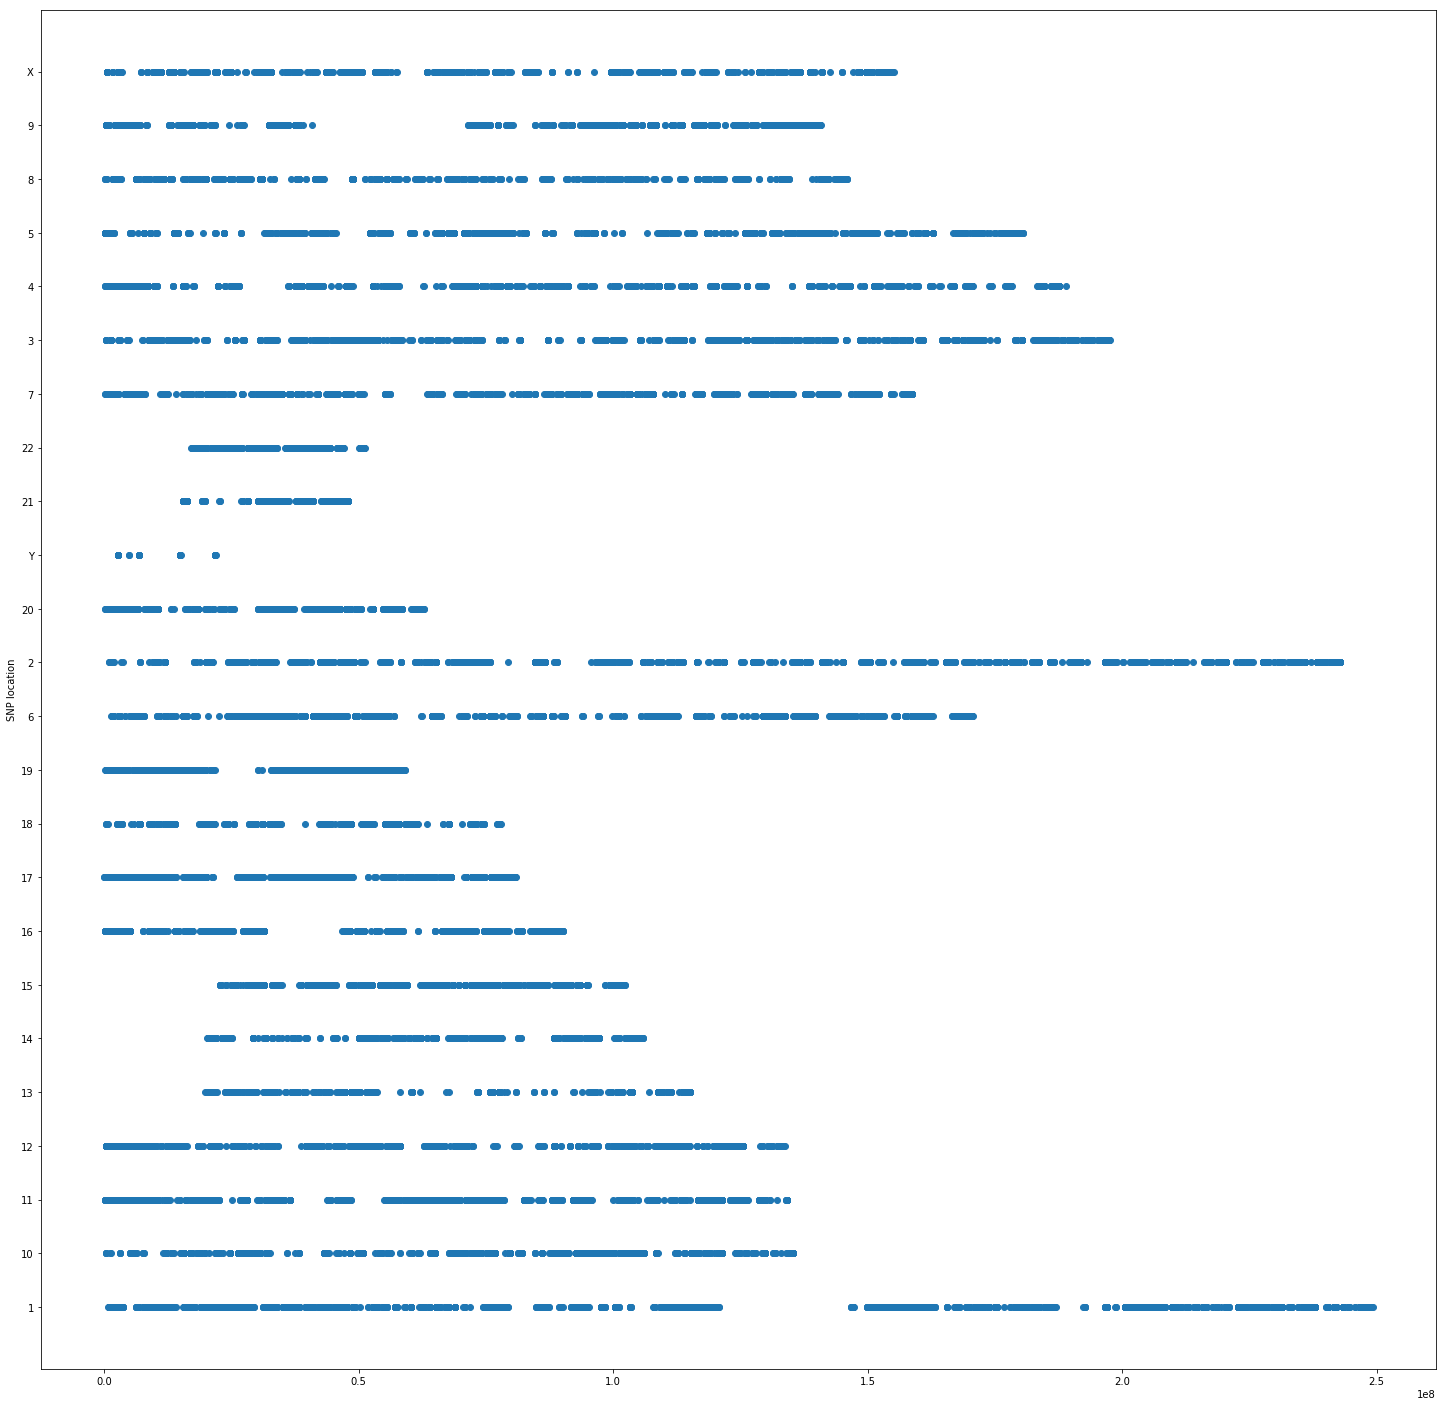

In [232]:
#plotting the SNPs present at various chromosomes
plt.scatter(p1['MapInfo'],p1['Chr'])
plt.ylabel('SNP location')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
print "Current size:", fig_size
 
# Set figure width to 25 and height to 25
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
plt.show()